In [21]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.svm import SVC #support vector machine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [22]:
data = pd.read_csv("D:\DNN\heart.csv")


Binary classifier

In [23]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Convert each nominal attribute to numerical values
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['ChestPainType'] = label_encoder.fit_transform(data['ChestPainType'])
data['RestingECG'] = label_encoder.fit_transform(data['RestingECG'] )
data['ExerciseAngina'] = label_encoder.fit_transform(data['ExerciseAngina'])
data['ST_Slope'] = label_encoder.fit_transform(data['ST_Slope'] )

In [24]:
x= data.drop(columns=['HeartDisease'] ,axis=1)
y= data['HeartDisease']

In [25]:
from sklearn.preprocessing import StandardScaler   
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  
 
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test) 

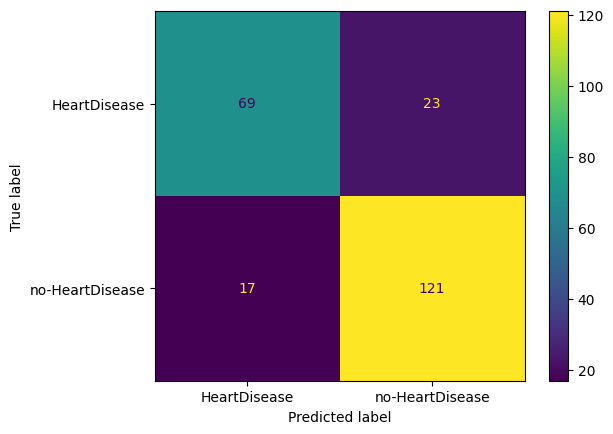

accuracy :  0.8260869565217391


In [26]:
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(x_train, y_train)  

y_pred= classifier.predict(x_test)  
actual =y_test
predicted=y_pred
confusion_matrix = metrics.confusion_matrix(actual,predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,display_labels=['HeartDisease','no-HeartDisease'])
cm_display.plot()
plt.show()

test_data_accuracy= accuracy_score(y_pred,y_test)
print('accuracy : ',test_data_accuracy)

Muiltclass classifier

The differential diagnosis of "erythemato-squamous" diseases is a real problem in dermatology. They all share the clinical features of erythema and scaling, with minimal differences. The disorders in this group are psoriasis, seborrheic dermatitis, lichen planus, pityriasis rosea, chronic dermatitis, and pityriasis rubra pilaris. Usually, a biopsy is necessary for the diagnosis, but unfortunately, these diseases share many histopathological features as well.

In [27]:
data1 = pd.read_csv("D:\DNN\dermatology_database_1.csv")
data1.head(10)

#data1['age']= data1['age'].astype(float)
print(data1.dtypes)

erythema                                int64
scaling                                 int64
definite_borders                        int64
itching                                 int64
koebner_phenomenon                      int64
polygonal_papules                       int64
follicular_papules                      int64
oral_mucosal_involvement                int64
knee_and_elbow_involvement              int64
scalp_involvement                       int64
family_history                          int64
melanin_incontinence                    int64
eosinophils_infiltrate                  int64
PNL_infiltrate                          int64
fibrosis_papillary_dermis               int64
exocytosis                              int64
acanthosis                              int64
hyperkeratosis                          int64
parakeratosis                           int64
clubbing_rete_ridges                    int64
elongation_rete_ridges                  int64
thinning_suprapapillary_epidermis 

the class attribute classified into 6 values 
0-psoriasis
1-seborrheic dermatitis,
2-lichen planus,
3-pityriasis rosea,
4-chronic dermatitis,
5-pityriasis rubra pilaris

In [28]:
from sklearn.ensemble import RandomForestClassifier # random forest classifier
from sklearn.impute import SimpleImputer
X= data1.drop(columns=['class','age'] ,axis=1)
Y= data1['class']
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

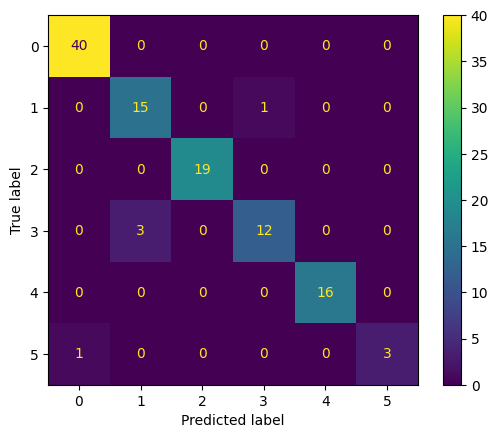

accuracy :  0.9545454545454546


In [29]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train,Y_train)
Y_prediction = rf_classifier.predict(X_test)
actual =Y_test
predicted=Y_prediction
confusion_matrix = metrics.confusion_matrix(actual,predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

test_data_accuracy= accuracy_score(Y_prediction,Y_test)
print('accuracy : ',test_data_accuracy)